In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_excel('clean_data/border_stats.xlsx', sheet_name=None)

/var/folders/j7/k7qj823s0t31v_8yw_h2y2qh0000gn/T/ipykernel_13454/3078681020.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


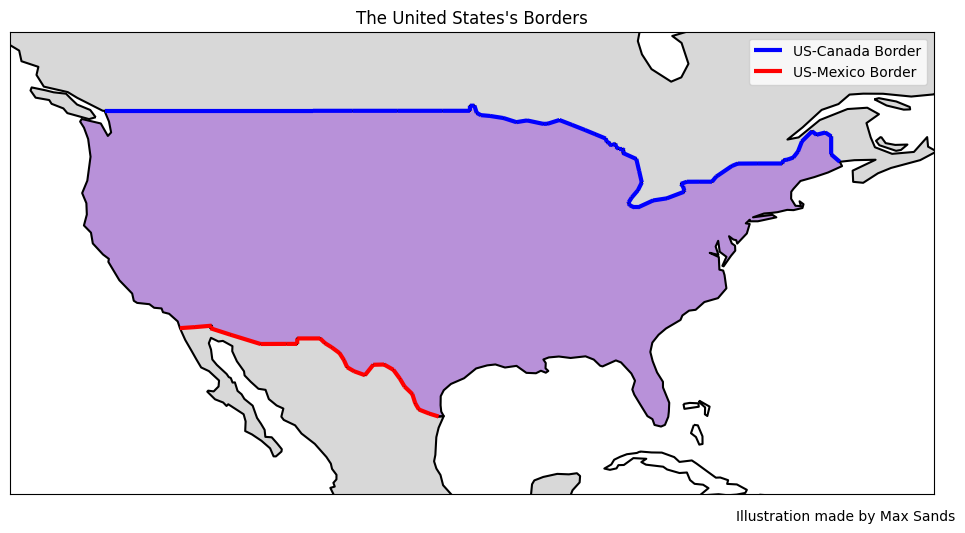

In [2]:
#| label: fig-us_map

# Load North America shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for North America countries
north_america = world[(world['continent'] == 'North America')]

# Filter out Hawaii
usa = north_america[north_america['name'] == 'United States of America']
usa = usa.explode(index_parts=True)  # Explode multipolygon geometries
continental_usa = usa[~usa.geometry.bounds.apply(lambda b: b['maxy'], axis=1).between(20, 30)]  # Remove Hawaii

# Combine with Canada and Mexico
canada_mexico = north_america[north_america['name'].isin(['Canada', 'Mexico'])]
north_america_filtered = pd.concat([continental_usa, canada_mexico])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
continental_usa.plot(ax=ax, color='#9357c6', alpha=.65)
ax.legend()
canada_mexico.plot(ax=ax, color='gray', alpha=0.3)

# Set the limits for x and y axes to zoom in on the area under y=55 and between x=-130 and 60
ax.set_xlim([-130, -60])
ax.set_ylim([20, 55])

# Hide axis tick marks and labels
ax.set_xticks([])
ax.set_yticks([])

# Extract boundaries
north_america_boundary = north_america.geometry.boundary

us_boundary = continental_usa.geometry.boundary.unary_union
canada_boundary = canada_mexico[canada_mexico['name'] == 'Canada'].geometry.boundary.unary_union
mexico_boundary = canada_mexico[canada_mexico['name'] == 'Mexico'].geometry.boundary.unary_union

# Find the intersection between US and Canada borders, and US and Mexico borders
us_canada_border = us_boundary.intersection(canada_boundary)
us_mexico_border = us_boundary.intersection(mexico_boundary)

# Plot US-Canada and US-Mexico borders
north_america.boundary.plot(ax=ax, color='black')
gpd.GeoSeries([us_canada_border]).plot(ax=ax, color='blue', linewidth=3, label='US-Canada Border')
gpd.GeoSeries([us_mexico_border]).plot(ax=ax, color='red', linewidth=3, label='US-Mexico Border')

# Add legend
ax.legend()

plt.title('The United States\'s Borders')
plt.text(x=-75, y=18, s='Illustration made by Max Sands')
plt.show()


In [6]:
df = data['CBP Encounter by type + Region']
x = df[df['Top Var'] == 'Total CBP']

In [8]:
x = x.pivot(index='Calendar Date', values='value', columns='Sub Var')

In [11]:
x

Sub Var,Air Ports of Entry,Coastal Border,Northern Land Border,SW Land Border,Total
Calendar Date,,,,,
2013-10-01,4125,4303,2480,41835,52743
2013-11-01,4123,3918,2644,38692,49377
2013-12-01,4124,3846,2576,36707,47253
2014-01-01,4679,4582,2145,35200,46606
2014-02-01,4038,4858,2461,42473,53830
...,...,...,...,...,...
2023-06-01,40125,10158,16618,144556,211457
2023-07-01,32107,10998,18569,183479,245153
2023-08-01,40634,10642,19834,232963,304073


In [22]:
import seaborn as sns